In [1]:
using PyPlot, LinearAlgebra, Statistics

# 1 dimensional example

In [2]:
# To be explicit, we use realistic physical values

m_e = 0.5109989461 #(electron mass in MeV / c^2)
hbar = 6.6*10^(-16) # hbar in eV * seconds
c = 3*10^18 # speed of light in angstroms per second
prefac = ((hbar*c)^2/(2*m_e*10^6)) # prefactor of free electron dispersion
a = 5;

In [3]:
bzone_boundary = pi/a
kpoints = -bzone_boundary:bzone_boundary/100:bzone_boundary;

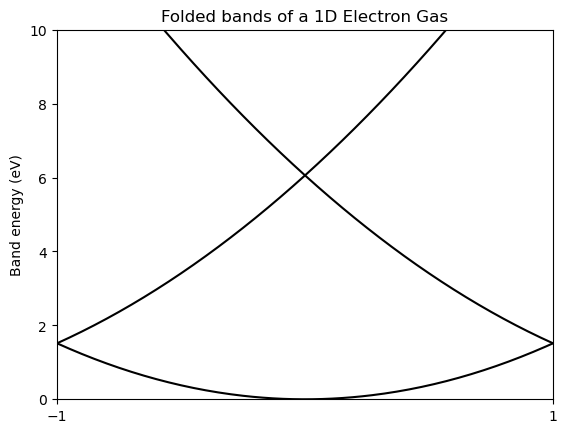

(0.0, 10.0)

In [330]:
for m in -2:2
    band = prefac * (kpoints .+ 2*pi/a * m).^ 2;
    plot(kpoints / bzone_boundary, band, color="black")
end
xlim(-1, 1)
xticks([-1, 1])
#yticks([0, 2])
title("Folded bands of a 1D Electron Gas")
ylabel("Band energy (eV)");
#gca().set_aspect("equal")
ylim(0, 10)

In [331]:
# Now we put in an interaction V_(-1)

In [332]:
function Hamiltonian(k::Float64, n::Integer, VGs::Vector{Float64})
    grange = collect(-n:n)
    diagonal_components = prefac * (k  .+ 2pi*grange/a).^2 # Free electron components
    H = diagm(diagonal_components)
    for (gidx, vg) in enumerate(VGs)
        for i in 1:(2n+1-gidx)
            H[i, i+gidx] = vg#prefac * (bzone_boundary)^2
        end
        for i in (gidx+1):2n+1
            H[i, i-gidx] = vg 
        end
    end
    return H
end;

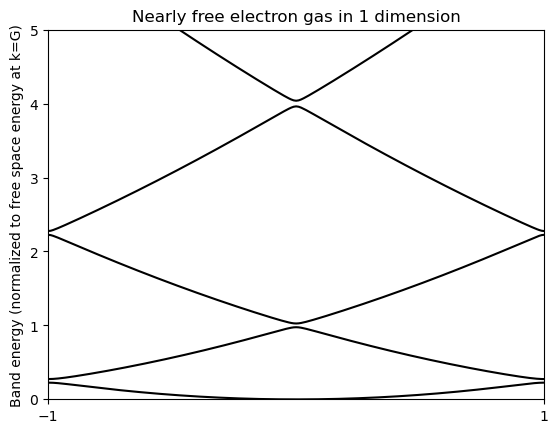

(0.0, 5.0)

In [334]:
n = 2
e_ks = zeros(length(kpoints), n * 2 + 1)
VGs = prefac * (bzone_boundary)^2 * [0.1, 0.1, 0.1, 0.15]
for (k_idx, kpoint) in enumerate(kpoints)
    e_ks[k_idx, :] = eigvals(Hamiltonian(kpoint, n, VGs))
end
plot(kpoints/bzone_boundary, e_ks/(prefac * (2pi/a)^2), color="black")
xlim(-1, 1)
xticks([-1, 1])
#yticks([0, 2])
ylabel("Band energy (normalized to free space energy at k=G)");
title("Nearly free electron gas in 1 dimension")
#gca().set_aspect("equal")
ylim(0, 5)

# Now we move on to two dimensions

# Without interactions first

In [335]:
bzone_boundary = pi/a
kpoints = -bzone_boundary:bzone_boundary/100:bzone_boundary;

In [336]:
n = m = 2
kxs = zeros(length(kpoints), length(kpoints))
kys = zeros(length(kpoints), length(kpoints))
eks = zeros(length(kpoints), length(kpoints), (2n+1) * (2m+1))
for (kx_idx, kx) in enumerate(kpoints)
    for (ky_idx, ky) in enumerate(kpoints)
        kxs[kx_idx, ky_idx] = kx
        kys[kx_idx, ky_idx] = ky
        idx = 1
        for i in -n:n
            for j in -m:m
                ek = prefac * ((kx+2pi*i/a)^2+(ky+2pi*j/a)^2)
                eks[kx_idx, ky_idx, idx] = ek
                idx += 1
            end
        end
    end
end

In [337]:
numbands = size(eks)[3]
n_electrons = 1
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands));

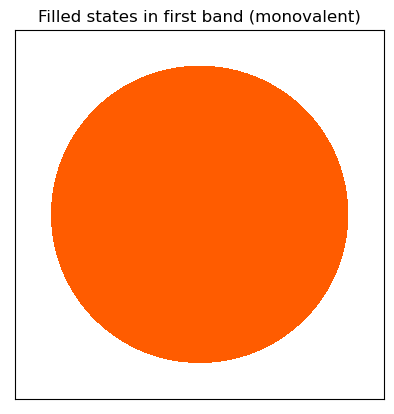

In [338]:
contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, 1], [0, fermi_energy], cmap="hot")
gca().set_aspect("equal")
xticks([])
yticks([])
title("Filled states in first band (monovalent)");

In [339]:
n_electrons = 2
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands)); 

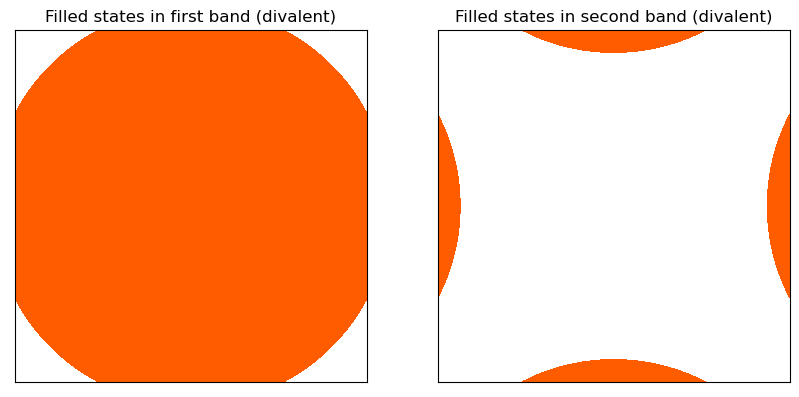

In [340]:
figure(figsize=(10, 5))
subplot(1, 2, 1)
contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, 1], [0, fermi_energy], cmap="hot")
gca().set_aspect("equal")
xticks([])
yticks([])
title("Filled states in first band (divalent)");
subplot(1, 2, 2)
contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, 2], [0, fermi_energy], cmap="hot")
gca().set_aspect("equal")
xticks([])
yticks([])
title("Filled states in second band (divalent)");

In [341]:
n_electrons = 5
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands)); 

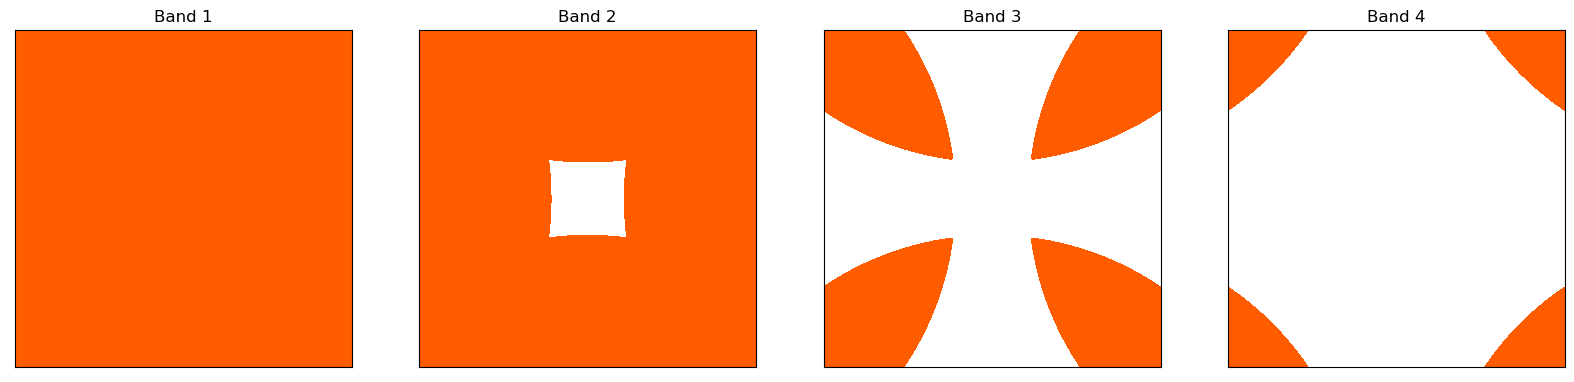

In [342]:
figure(figsize=(20, 5))
for i in 1:4
    subplot(1, 4, i)
    title("Band $i")
    contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, i], [0, fermi_energy], cmap="hot")
    gca().set_aspect("equal")
    xticks([])
    yticks([])
end

# Plot of the free electron dispersion for 1, 2, 3, 4, and 5 electrons per unit cell, so one can see how the contour plots above arise from folding in into the first BZ

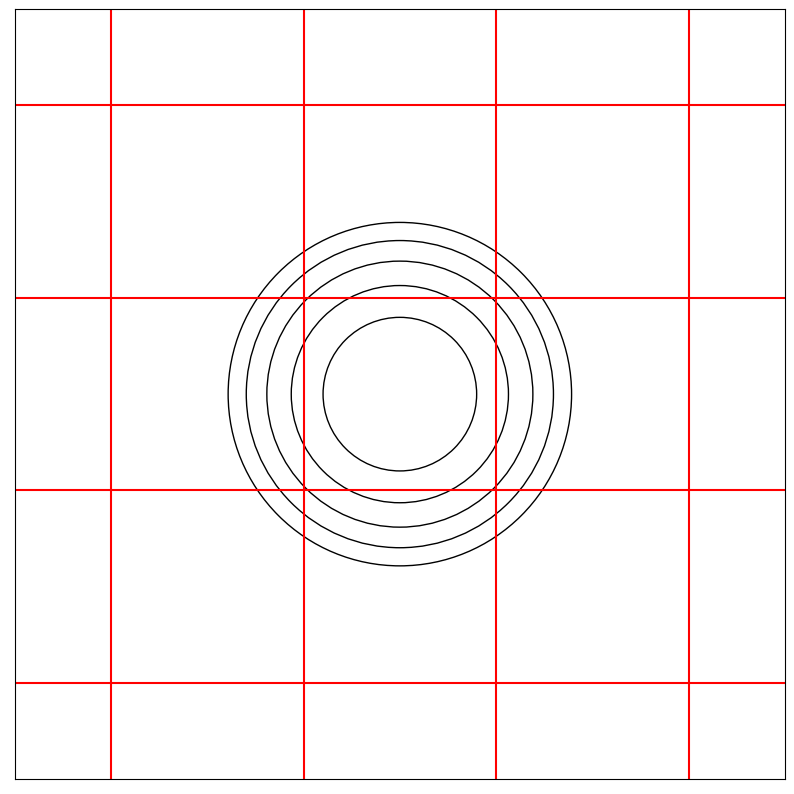

In [343]:
figure(figsize=(10, 10))
n_electrons=1
N = 4
radius = sqrt((n_electrons/2)/pi)
gca().add_artist(plt.Circle((0, 0), radius, fill=false))
n_electrons=2
radius = sqrt((n_electrons/2)/pi)
gca().add_artist(plt.Circle((0, 0), radius, fill=false))
n_electrons=3
radius = sqrt((n_electrons/2)/pi)
gca().add_artist(plt.Circle((0, 0), radius, fill=false))
n_electrons=4
radius = sqrt((n_electrons/2)/pi)
gca().add_artist(plt.Circle((0, 0), radius, fill=false))
n_electrons=5
radius = sqrt((n_electrons/2)/pi)
gca().add_artist(plt.Circle((0, 0), radius, fill=false))


for i in range(-10, 10)
    vlines([-0.5+i], -0.5*N, 0.5*N, color="red")
    hlines([-0.5+i], -0.5*N, 0.5*N, color="red")
end
xlim(-0.5*N, 0.5*N)
ylim(-0.5*N, 0.5*N)
xticks([])
yticks([])
gca().set_aspect("equal")

In [344]:
# Now we do a cut of the disperision along X-gamma-M-X-gamma

In [345]:
ks_cut = Vector{Float64}[]
N = 50
for i in 1:N
    push!(ks_cut, [0.5, 0] - [0.5, 0] * (i-1)/N)
end
for i in 1:N
    push!(ks_cut, [0, 0] + [0.5, 0.5] * (i-1)/N)
end
for i in 1:N
    push!(ks_cut, [0.5, 0.5] - [0, 0.5] * (i-1)/N)
end
for i in 1:N+1
    push!(ks_cut, [0.5, 0] - [0.5, 0] * (i-1)/N)
end

In [346]:
n = m = 1
eks = zeros(length(ks_cut), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut)
    idx = 1
    for i in -n:n
        for j in -m:m
            kx, ky = k * 2pi/a
            ek = prefac * ((kx+2pi*i/a)^2+(ky+2pi*j/a)^2)
            eks[k_idx, idx] = ek
            idx += 1
        end
    end
end

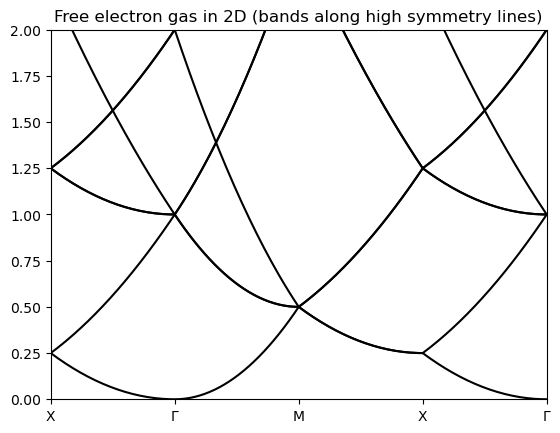

PyObject Text(0.5, 1.0, 'Free electron gas in 2D (bands along high symmetry lines)')

In [347]:
plot(1:4N+1, eks/(prefac*(2pi/a)^2), color="black")
xticks([1, N+1, 2N+1, 3N+1, 4N+1], ["X", "Γ", "M", "X", "Γ"])
ylim(0, 2)
xlim(1, 4N+1)
title("Free electron gas in 2D (bands along high symmetry lines)")

# Now we put in interactions
# We have now a $(2n+1)\times(2m+1)$ by $(2n+1)\times(2m+1)$ Hamiltonian matrix

In [5]:
function Hamiltonian(kx::Float64, ky::Float64, n::Integer, VGs::Matrix{Float64})
    grange = collect(-n:n)
    diagonal_components  = zeros((2n+1)^2)
    idx = 1
    gs = Vector{Vector{Float64}}()
    for i in -n:n
        for j in -n:n
            diagonal_components[idx] = prefac * (kx  .+ 2pi*i/a).^2 + prefac * (ky  .+ 2pi*j/a).^2
            push!(gs, [i, j])
            idx += 1
        end
    end
    H = diagm(diagonal_components)
    g1max, g2max = size(VGs)
    for i in 1:length(diagonal_components)
        row_g = gs[i]
        for g1 in 1:g1max
            for g2 in 1:g2max
                VG = VGs[g1, g2]
                (g1 == 1 && g2 == 1) && continue
                column_g = row_g + [g1-1, g2-1]
                j = findfirst(x->x==column_g, gs)
                !isnothing(j) && (H[i, j] = VG)
                column_g = row_g - [g1-1, g2-1]
                j = findfirst(x->x==column_g, gs)
                !isnothing(j) && (H[i, j] = VG)
            end
        end
    end
    return H
end;

In [361]:
V1, V2, V3 = 0.1, 0.1, 0.2
VGs =  prefac * (bzone_boundary)^2 * [0 V1 V2; V1 V3 0; V2 0 0];

In [362]:
n = m = 2
eks_interacting = zeros(length(ks_cut), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut)
    kx, ky = k * 2pi/a
    eks_interacting[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

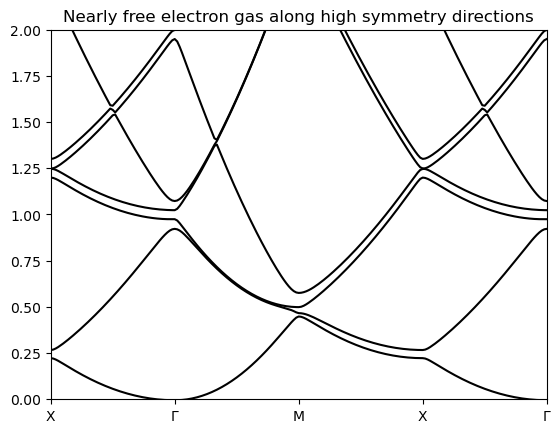

PyObject Text(0.5, 1.0, 'Nearly free electron gas along high symmetry directions')

In [363]:
N=50
plot(1:4N+1, eks_interacting/(prefac*(2pi/a)^2), color="black")
xticks([1, N+1, 2N+1, 3N+1, 4N+1], ["X", "Γ", "M", "X", "Γ"])
ylim(0, 2)
xlim(1, 4N+1)
title("Nearly free electron gas along high symmetry directions")

In [364]:
ks_cut_gamma_x = Vector{Float64}[]
N = 200
X = [0, 0.5]
for i in 1:N
    push!(ks_cut_gamma_x, X * (i-1)/N)
end
for i in 1:N+1
    push!(ks_cut_gamma_x, X - X * (i-1)/N )
end
n = m = 4
eks_interacting_gamma_x = zeros(length(ks_cut_gamma_x), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut_gamma_x)
    kx, ky = k * 2pi/a
    eks_interacting_gamma_x[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

# A cut across the Bragg plane
# (see how the group velocity across the Bragg plane goes to zero) 

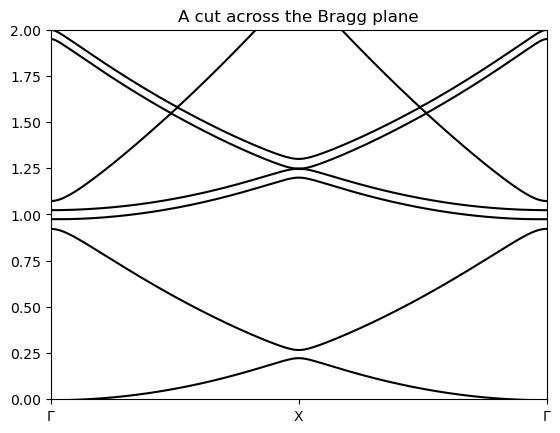

PyObject Text(0.5, 1.0, 'A cut across the Bragg plane')

In [366]:
plot(1:2N+1, sort(eks_interacting_gamma_x, dims=2)/(prefac*(2pi/a)^2), color="black")
xticks([1, N+1, 2N+1], ["Γ", "X", "Γ"])
ylim(0, 2)
xlim(1, 2N+1)
title("A cut across the Bragg plane")

In [69]:
V1, V2, V3 = 0.1, 0.1, 0.2
VGs =  prefac * (bzone_boundary)^2 * [0 V1 V2; V1 V3 0; V2 0 0];

bzone_boundary = pi/a
kpoints = -bzone_boundary:bzone_boundary/200:bzone_boundary;
n = 2
kxs = zeros(length(kpoints), length(kpoints))
kys = zeros(length(kpoints), length(kpoints))
eks = zeros(length(kpoints), length(kpoints), (2n+1) * (2n+1))
for (kx_idx, kx) in enumerate(kpoints)
    for (ky_idx, ky) in enumerate(kpoints)
        kxs[kx_idx, ky_idx] = kx
        kys[kx_idx, ky_idx] = ky
        eks[kx_idx, ky_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
    end
end

# Fermi surfaces with the potential

In [70]:
numbands = size(eks)[3]
n_electrons = 5
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands));

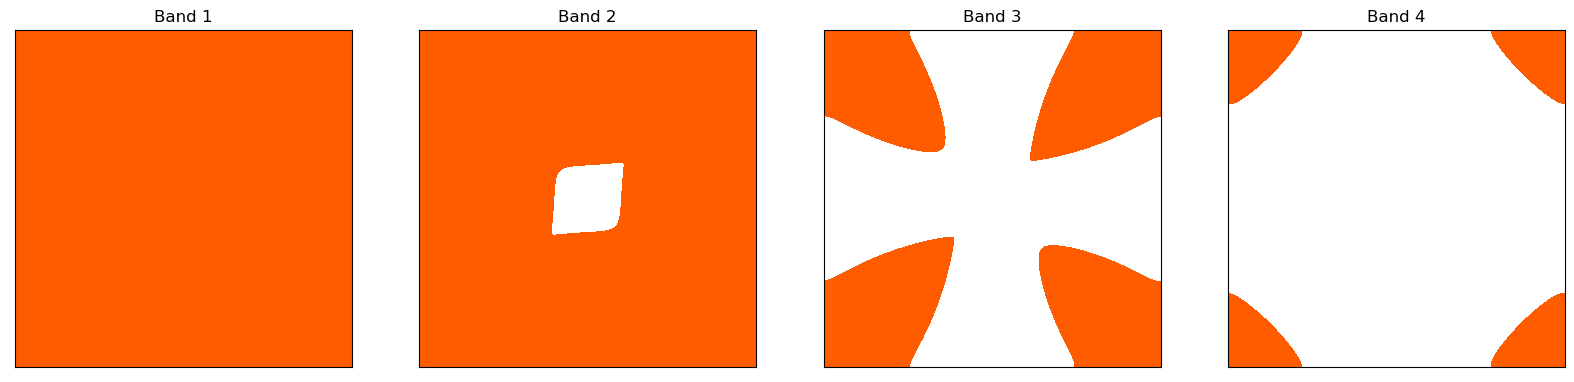

In [71]:
figure(figsize=(20, 5))
for i in 1:4
    subplot(1, 4, i)
    contourf(kxs, kys, sort(eks, dims=3)[:, :, i], [-10, fermi_energy], cmap="hot")
    gca().set_aspect("equal")
    xticks([])
    yticks([])
    title("Band $i")
end


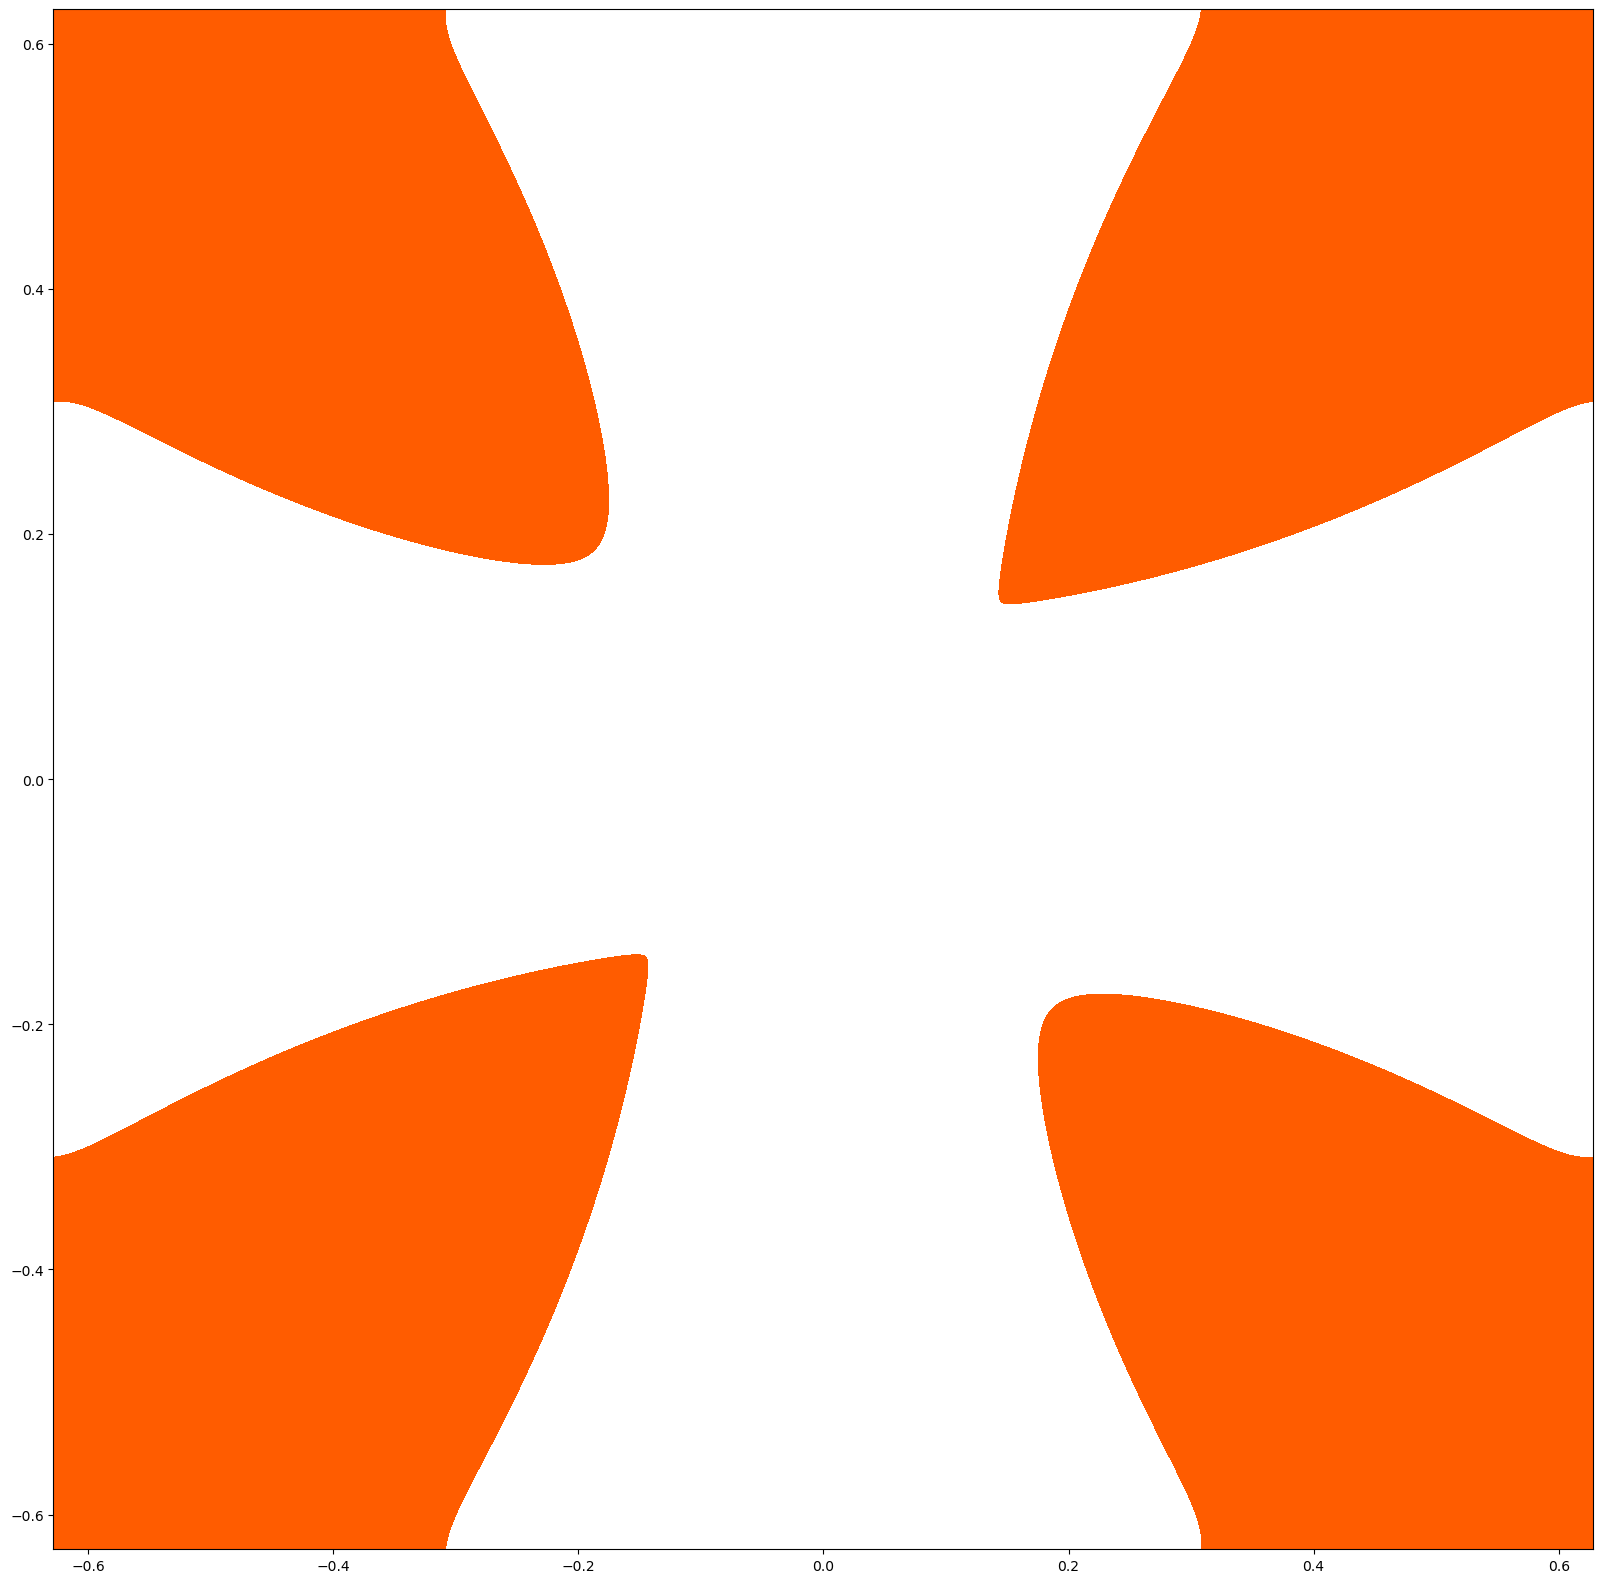

In [72]:
figure(figsize=(20,20))
contourf(kxs, kys, sort(eks, dims=3)[:, :, 3], [-10, fermi_energy], cmap="hot")
gca().set_aspect("equal")


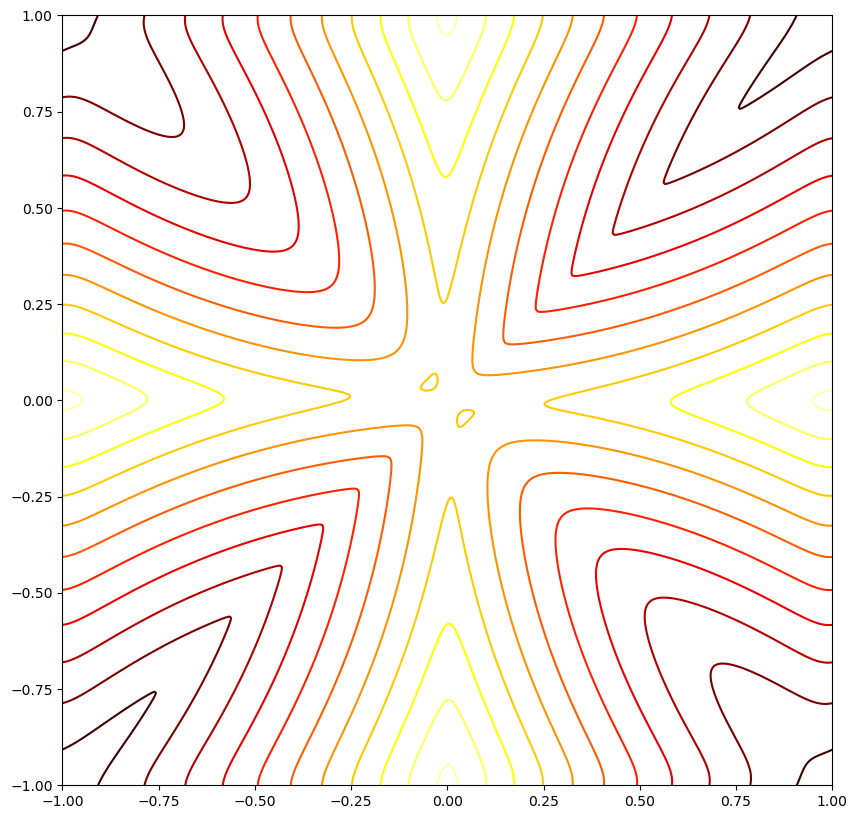

In [397]:
figure(figsize=(10, 10))
contour(kxs / bzone_boundary, kys/ bzone_boundary, sort(eks, dims=3)[:, :, 3], 10, cmap="hot")
gca().set_aspect("equal")
#xlim(-1, -0.8)
#ylim(0, 0.5)


# Find saddle points: Plot as k_x changes and then plot as k_y changes to determine effective masses

In [367]:
V1, V2, V3 = 0.3, 0.6, 0
VGs =  prefac * (bzone_boundary)^2 * [0 V1 V2; V1 V3 0; V2 0 0];
ks_cut_gamma_x = Vector{Float64}[]
N = 1000
X = [0.5, 0]
for i in 1:N+1
    push!(ks_cut_gamma_x, X - [0.1, 0] + [0.2, 0]*(i-1)/N)
end
n = m = 4
eks_interacting_gamma_x = zeros(length(ks_cut_gamma_x), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut_gamma_x)
    kx, ky = k * 2pi/a
    eks_interacting_gamma_x[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

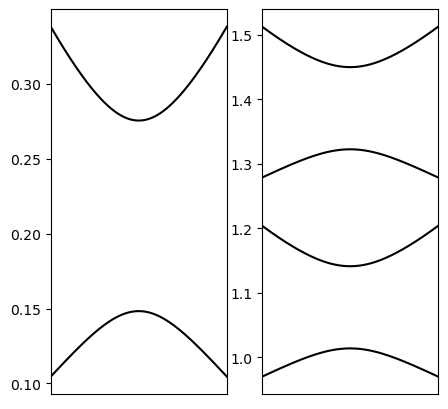

(Any[], Any[])

In [378]:
figure(figsize=(5, 5))
subplot(1, 2, 1)
xlim(1, N+1)
xticks([])
plot(1:N+1, eks_interacting_gamma_x[:, 1:2]/(prefac*(2pi/a)^2), color="black")
subplot(1, 2, 2)
plot(1:N+1, eks_interacting_gamma_x[:, 3:6]/(prefac*(2pi/a)^2), color="black")
xlim(1, N+1)
#ylim(1.2, 1.3)
xticks([])

In [372]:
ks_cut_m_x = Vector{Float64}[]
N = 1000
X = [0.5, 0]
for i in 1:N+1
    push!(ks_cut_m_x, X - [0, 0.1] + [0, 0.2]*(i-1)/N)
end
n = m = 4
eks_interacting_m_x = zeros(length(ks_cut_m_x), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut_m_x)
    kx, ky = k * 2pi/a
    eks_interacting_m_x[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

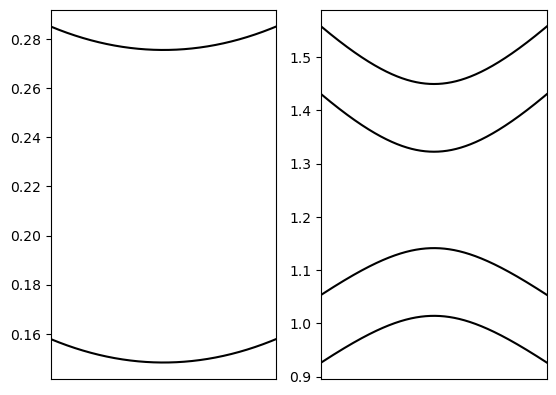

(1.0, 1001.0)

In [376]:
subplot(1, 2, 1)
plot(1:N+1, eks_interacting_m_x[:, 1:2]/(prefac*(2pi/a)^2), color="black")
xticks([])
xlim(1, N+1)
subplot(1, 2, 2)
plot(1:N+1, eks_interacting_m_x[:, 3:6]/(prefac*(2pi/a)^2), color="black")
xticks([])
xlim(1, N+1)
xlim(1, N+1)
#ylim(1.2, 1.3)
#ylim(0.2, 0.3)

In [66]:
V1, V2, V3 = 0.1, 0.2, 0.1
VGs =  prefac * (bzone_boundary)^2 * [0 V1 V2; V1 V3 0; V2 0 0];
ks_cut_arb_x = Vector{Float64}[]
N = 1000
X = [0.5, 0]
for i in 1:N+1
    push!(ks_cut_arb_x, [0, 0.2] + X - [0.1, 0] + [0.2, 0]*(i-1)/N)
end
n = m = 4
eks_interacting_arb_x = zeros(length(ks_cut_arb_x), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut_arb_x)
    kx, ky = k * 2pi/a
    eks_interacting_arb_x[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

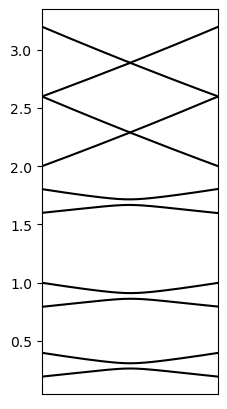

(Any[], Any[])

In [68]:
figure(figsize=(5, 5))
subplot(1, 2, 1)
xlim(1, N+1)
xticks([])
plot(1:N+1, eks_interacting_arb_x[:, 1:10]/(prefac*(2pi/a)^2), color="black")
#ylim(1.2, 1.3)
xticks([])